In [58]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs
    

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
print(tf.__version__)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
2.1.0


In [40]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()


# 气缸(cylinders)，排量(displayment)，马力(horsepower) 和重量(weight)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [41]:
dataset.isna().sum()
dataset = dataset.dropna()

# dataset['Origin'] = 
new_origin=(dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x)))
dataset['Origin']=new_origin
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


NameError: name 'train_dataset' is not defined

In [43]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

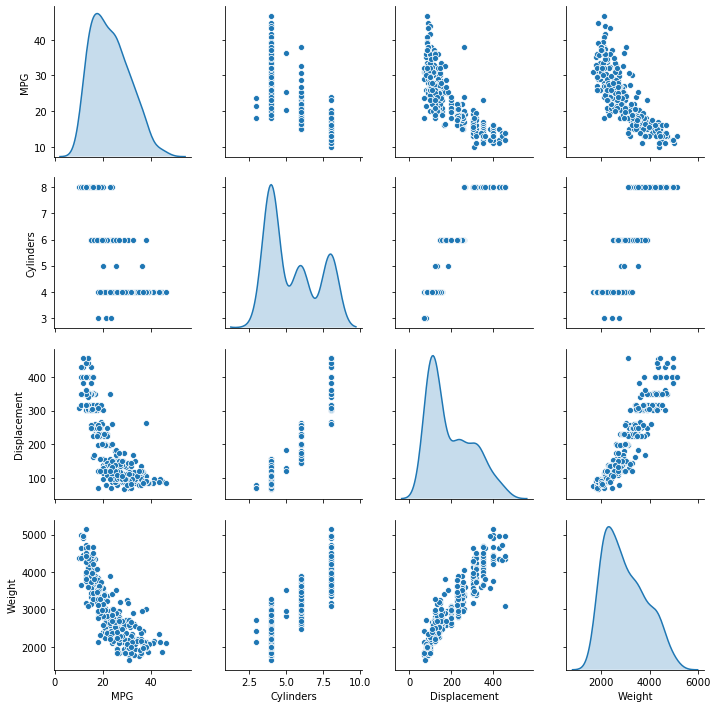

In [44]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [45]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [46]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [47]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [48]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [52]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [53]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.09245868],
       [ 0.0739104 ],
       [-0.05257609],
       [-0.04808959],
       [-0.6791114 ],
       [-0.08391759],
       [-0.61457545],
       [-0.07493705],
       [ 0.13015305],
       [ 0.01924014]], dtype=float32)

In [59]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:572.2971,  mae:22.6831,  mse:572.2971,  val_loss:556.5843,  val_mae:22.3732,  val_mse:556.5844,  
....................................................................................................
Epoch: 100, loss:5.9493,  mae:1.6972,  mse:5.9493,  val_loss:8.7231,  val_mae:2.2485,  val_mse:8.7231,  
....................................................................................................
Epoch: 200, loss:5.2057,  mae:1.5435,  mse:5.2057,  val_loss:8.8252,  val_mae:2.2511,  val_mse:8.8252,  
....................................................................................................
Epoch: 300, loss:4.8710,  mae:1.4655,  mse:4.8710,  val_loss:9.2829,  val_mae:2.3166,  val_mse:9.2829,  
....................................................................................................
Epoch: 400, loss:4.3383,  mae:1.4118,  mse:4.3383,  val_loss:9.4842,  val_mae:2.3166,  val_mse:9.4842,  
..............................................................

In [60]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.425100,1.024362,2.425100,10.547896,2.428275,10.547896,995
996,2.387992,1.011077,2.387992,10.383747,2.426769,10.383747,996
997,2.471767,1.083405,2.471766,10.727214,2.600841,10.727214,997
998,2.407025,1.013784,2.407025,10.726290,2.551514,10.726291,998
999,2.369191,1.024988,2.369191,10.303248,2.498340,10.303247,999


In [61]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [MPG]')

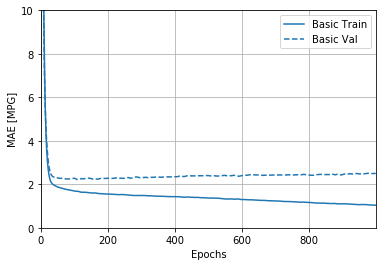

In [62]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [63]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:586.8465,  mae:22.9228,  mse:586.8466,  val_loss:582.8369,  val_mae:22.8057,  val_mse:582.8369,  
....................................................................................................
Epoch: 100, loss:6.0271,  mae:1.7080,  mse:6.0271,  val_loss:7.9405,  val_mae:2.1526,  val_mse:7.9405,  
..............

Text(0, 0.5, 'MAE [MPG]')

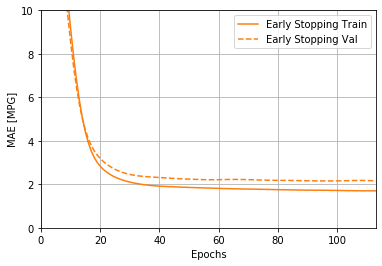

In [64]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [65]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)


78/78 - 0s - loss: 5.8033 - mae: 1.9431 - mse: 5.8033


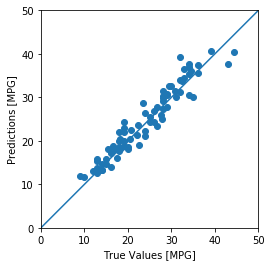

In [66]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [67]:
test_predictions

array([15.874323, 11.695622, 11.936821, 24.230759, 22.087845, 13.284401,
       13.40515 , 13.398311, 19.933107, 30.166864, 25.412313, 24.290262,
       15.31785 , 27.384714, 12.692129, 14.592337, 14.756889, 13.782742,
       18.63078 , 13.106092, 13.974667, 26.3802  , 19.992695, 21.180159,
       30.044788, 24.320992, 17.096495, 22.36464 , 17.754726, 18.586426,
       27.826523, 22.097225, 18.734589, 21.361246, 26.935287, 16.111385,
       19.01461 , 30.432896, 30.665398, 18.198013, 31.18779 , 29.168804,
       15.716944, 37.554035, 35.59222 , 36.44324 , 20.435112, 22.40717 ,
       20.379574, 25.973473, 31.416466, 18.222878, 32.71191 , 18.891335,
       18.05483 , 18.338331, 33.88225 , 35.332157, 22.878338, 25.125166,
       40.342434, 33.82048 , 27.695042, 28.755241, 32.576214, 40.704956,
       37.672466, 35.95711 , 34.44174 , 31.490154, 23.644009, 23.405872,
       29.87038 , 30.527649, 37.428654, 37.032406, 39.181534, 30.3008  ],
      dtype=float32)

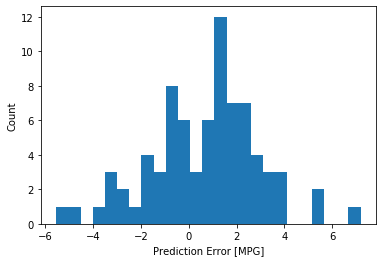

In [68]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [77]:
len())

78

In [78]:
test_dataset['prdicted-mpg']=model.predict(normed_test_data).flatten()
test_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,prdicted-mpg
9,8,390.0,190.0,3850.0,8.5,70,0,0,1,15.874323
25,8,360.0,215.0,4615.0,14.0,70,0,0,1,11.695622
28,8,304.0,193.0,4732.0,18.5,70,0,0,1,11.936821
31,4,113.0,95.0,2228.0,14.0,71,0,1,0,24.230759
33,6,232.0,100.0,2634.0,13.0,71,0,0,1,22.087845
...,...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82,0,0,1,30.527649
375,4,105.0,74.0,1980.0,15.3,82,1,0,0,37.428654
382,4,108.0,70.0,2245.0,16.9,82,0,1,0,37.032406
384,4,91.0,67.0,1965.0,15.7,82,0,1,0,39.181534
